In [2]:
import pandas as pd
import numpy as np
import heapq
import random
import matplotlib.pyplot as plt
from math import floor

In [3]:
from surprise import Reader, Dataset
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate

##### Import Data

In [4]:
recipes = pd.read_csv('rr-recipes.csv')
ratings = pd.read_csv('rr-ratings.csv')

In [5]:
ratings.head(2)

,userid,itemid,rating
0,675719,7000,5
1,1478626,7000,5


In [6]:
ratings.itemid

0           7000
1           7000
2           7000
3           7000
4           7000
           ...  
1555576    27511
1555577    27511
1555578    27511
1555579    27511
1555580    27511
Name: itemid, Length: 1555581, dtype: int64

In [7]:
ratings.head(20)

,userid,itemid,rating
0,675719,7000,5
1,1478626,7000,5
2,608663,7000,5
3,2785736,7000,5
4,594474,7000,5
5,5468,7000,5
6,2926455,7000,5
7,1896099,7000,5
8,25495,7000,4
9,539102,7000,5


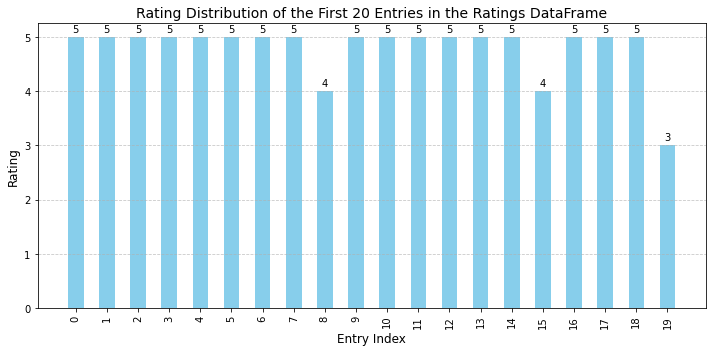

In [8]:
top_20_ratings = ratings.head(20)

# Plotting
plt.figure(figsize=(10, 5))
bars = plt.bar(top_20_ratings.index, top_20_ratings['rating'], color='skyblue', width=0.5)

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Entry Index', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Rating Distribution of the First 20 Entries in the Ratings DataFrame', fontsize=14)
plt.xticks(top_20_ratings.index, fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [9]:
ratings.shape

(1555581, 3)

In [10]:
recipes.head(2)

,itemid,title,prep_time,cook_time,ready_time,ingredients,directions,url,photo_url
0,7000,Golden Crescent Rolls Recipe,25,15,190,"yeast,water,white sugar,salt,egg,butter,flour,...","Dissolve yeast in warm water.**Stir in sugar, ...",https://www.allrecipes.com/recipe/7000,https://images.media-allrecipes.com/userphotos...
1,7001,Poppy Seed Bread with Glaze Recipe,15,60,80,"flour,salt,baking powder,poppy,butter,vegetabl...",'Preheat oven to 350 degrees F (175 degrees C)...,https://www.allrecipes.com/recipe/7001,https://images.media-allrecipes.com/userphotos...


In [11]:
recipes.head(12)

,itemid,title,prep_time,cook_time,ready_time,ingredients,directions,url,photo_url
0,7000,Golden Crescent Rolls Recipe,25,15,190,"yeast,water,white sugar,salt,egg,butter,flour,...","Dissolve yeast in warm water.**Stir in sugar, ...",https://www.allrecipes.com/recipe/7000,https://images.media-allrecipes.com/userphotos...
1,7001,Poppy Seed Bread with Glaze Recipe,15,60,80,"flour,salt,baking powder,poppy,butter,vegetabl...",'Preheat oven to 350 degrees F (175 degrees C)...,https://www.allrecipes.com/recipe/7001,https://images.media-allrecipes.com/userphotos...
2,7003,Applesauce Bread I Recipe,10,80,90,"flour,egg,white sugar,vegetable oil,applesauce...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/7003,https://images.media-allrecipes.com/userphotos...
3,7006,Apple Raisin Bread Recipe,15,60,75,"flour,baking powder,baking soda,salt,cinnamon,...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/7006,https://images.media-allrecipes.com/userphotos...
4,7007,Buttermilk Oatmeal Bread Recipe,20,60,100,"oat,buttermilk,vegetable oil,egg,brown sugar,f...",Mix oats with buttermilk. Let stand for 1/2 h...,https://www.allrecipes.com/recipe/7007,https://images.media-allrecipes.com/userphotos...
5,7008,Kolaches II Recipe,0,20,125,"shortening,white sugar,salt,milk,egg,lemon,yea...",Cream shortening and sugar together. Stir in ...,https://www.allrecipes.com/recipe/7008,https://images.media-allrecipes.com/userphotos...
6,7009,Whole Wheat Bread II Recipe,20,35,145,"shortening,water,brown sugar,yeast,water,white...",Dissolve brown sugar in 1 cup hot water. Add ...,https://www.allrecipes.com/recipe/7009,https://images.media-allrecipes.com/userphotos...
7,7012,Cottage Cheese Bread II Recipe,5,180,185,"water,cottage cheese,vegetable oil,egg,flour,w...",Add the ingredients to the pan of your bread m...,https://www.allrecipes.com/recipe/7012,https://images.media-allrecipes.com/userphotos...
8,7013,Mocha Chocolate Chip Banana Muffins Recipe,10,25,35,"margarine,white sugar,egg,banana,coffee,water,...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/7013,https://images.media-allrecipes.com/userphotos...
9,7014,'Ruby''s Special Cornbread Recipe ',0,45,55,"cornmeal,milk,egg,bell pepper,onion,garlic,sal...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/7014,https://images.media-allrecipes.com/userphotos...


In [12]:
ingredients = pd.DataFrame(recipes.ingredients,columns=['ingredients'])
ingredients['count'] = 1

In [13]:
ingredients_g = ingredients.groupby('ingredients').count().reset_index()
ingredients_g = ingredients_g.sort_values('count', ascending=False)
ingredients_g.head(5)

,ingredients,count
3765,"chocolate,chocolate",4
5922,"flour,salt,shortening,water",4
4441,"cream cheese,marshmallow",3
4277,"cranberry,marshmallow,white sugar,pineapple,ba...",3
5642,"flour,brown sugar,white sugar,pumpkin,vegetabl...",3


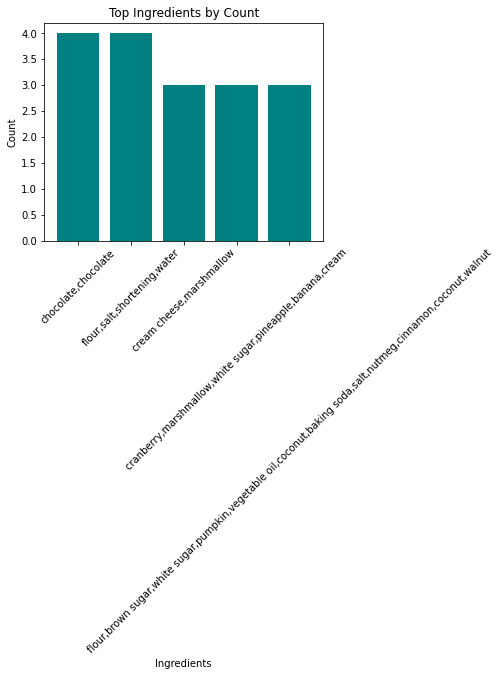

In [14]:
top_ingredients = ingredients_g.head()
plt.figure(figsize=(5, 4))
plt.bar(top_ingredients['ingredients'], top_ingredients['count'], color='teal')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.title('Top Ingredients by Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [15]:
min_recipe_ratings = 150
filter_recipes = ratings['itemid'].value_counts() > min_recipe_ratings
filter_recipes = filter_recipes[filter_recipes].index.tolist()

min_user_ratings = 150
filter_users = ratings['userid'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

ratings = ratings[(ratings['itemid'].isin(filter_recipes)) & (ratings['userid'].isin(filter_users))]
ratings.shape

(28806, 3)

In [16]:
users = ratings.userid.unique()

In [17]:
users.shape

(177,)

In [18]:
ratings.to_csv('ratings-s.csv',index=False)

##### Define a Ratings scale
This scale is determined by the lowest and highest rating possible. 
In this case the lowest rating is 1, while the highest is 5.

In [19]:
reader = Reader(rating_scale=(1,5)) # This just defines the rating scale
data = Dataset.load_from_df(ratings[['userid', 'itemid', 'rating']], reader=reader)

### Build the model

##### KNN with Means - Surprise

[KNN with Means](https://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNWithMeans) has been chosen for the recommender, which is a basic collaborative filtering algorithm, taking into account the mean ratings of each user.

In [20]:
def build_recommender(user_based=False, sim_type='cosine'):
    sim_options = {
        "name": sim_type,
        "user_based": user_based
    }

    return KNNWithMeans(sim_options=sim_options)

##### Calculate the Similarity Matrix

Ignoring folds this builds the *Trainset* using [build_full_trainset()](https://surprise.readthedocs.io/en/stable/dataset.html#surprise.dataset.DatasetAutoFolds.build_full_trainset)

The Trainset is built using the data, but then contains more information about the data

In [21]:
trainset = data.build_full_trainset()
# user_based_recommender = build_recommender(user_based=True)
item_based_recommender = build_recommender()
# User based seems to give a memory error when fit, due to the much larger amount of users than recipes.
# user_based_recommender.fit(trainset)
item_based_recommender.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


### Evaluate the Model

Using [cross_validation()](https://surprise.readthedocs.io/en/stable/model_selection.html#cross-validation) from surprise, we can quickly evaluate the model using a few metrics. 

In [22]:
cross_validate(item_based_recommender, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7929  0.7689  0.7950  0.7824  0.7784  0.7835  0.0096  
MAE (testset)     0.5871  0.5839  0.5964  0.5900  0.5846  0.5884  0.0046  
Fit time          0.64    0.64    0.65    0.64    0.66    0.65    0.01    
Test time         0.95    0.95    0.94    0.92    0.94    0.94    0.01    


{'test_rmse': array([0.79294578, 0.76890951, 0.79500721, 0.78242902, 0.77835808]),
 'test_mae': array([0.58713076, 0.58386846, 0.59642191, 0.58998931, 0.58456638]),
 'fit_time': (0.6405453681945801,
  0.6426069736480713,
  0.6511087417602539,
  0.6438887119293213,
  0.6584992408752441),
 'test_time': (0.9474616050720215,
  0.9510283470153809,
  0.9447615146636963,
  0.9192490577697754,
  0.939983606338501)}

### Inference


In [23]:
def get_r(user_id):
    # Select which system to use. Due to memory constraints, item based is the only viable option
    recommender_system = item_based_recommender
    # N will represent how many items to recommend
    N = 1000
    
    # The setting to a set and back to list is a failsafe.
    rated_items = list(set(ratings.loc[ratings['userid'] == user_id]['itemid'].tolist()))
    ratings_list = recipes['itemid'].values.tolist()
    reduced_ratings = ratings.loc[ratings['itemid'].isin(ratings_list)].copy()
    
    # Self explanitory name
    all_item_ids = list(set(reduced_ratings['itemid'].tolist()))
    
    # New_items just represents all the items not rated by the user
    new_items = [x for x in all_item_ids if x not in rated_items]
    
    # Estimate ratings for all unrated items
    predicted_ratings = {}
    for item_id in new_items:
        predicted_ratings[item_id] = recommender_system.predict(user_id, item_id).est
        pass
    
    # Get the item_ids for the top ratings
    recommended_ids = heapq.nlargest(N, predicted_ratings, key=predicted_ratings.get)
    recommended_ids = sorted(recommended_ids)
    
    # predicted_ratings
    recommended_df = recipes.loc[recipes['itemid'].isin(recommended_ids)].copy()
    #recommended_df.insert(1, 'pred_rating', np.zeros(len(recommended_ids)))
    recommended_df.insert(1, 'pred_rating', 0)
    
    # recommended_df = recipes.copy()
    for idx,item_id in enumerate(recommended_ids):
        recommended_df.iloc[idx, recommended_df.columns.get_loc('pred_rating')] = predicted_ratings[item_id]
        pass
    return recommended_df.head(N).sort_values('pred_rating', ascending=False)

In [24]:
def cap_str(item):
    string = item
    return string.capitalize()

def reg_frame(r_list,items):
    s_ = ''
    for i in items:
        j = i.strip()
        str_ = f'(?=.*{j})'
        s_ += str_
    s_
    r_list = r_list[r_list['ingredients'].str.contains(fr'^\b{s_}\b',regex=True)]
    return r_list

def set_up_ml(user_id,ingredient_list):
    recipe_list = get_r(user_id)
    items = ingredient_list.split(',')
    recipe_list = reg_frame(recipe_list,items)
    return recipe_list

### Get a Recommendation Based on Ingredients

The final code that will be impletented in a cleaner fashion through the browser interface.

In [25]:
ingredient_list = 'spinach,cheese'

In [26]:
user_1 = random.choice(users)#123711 # user with a medium amount of ratings
user_2 = random.choice(users)#15078 # user with the lowest number of ratings
user_3 = random.choice(users)#72315 # user with a lot of ratings

In [27]:
recommended_list_1 = set_up_ml(user_1,ingredient_list) # generate a list of recommendations for each user
recommended_list_2 = set_up_ml(user_2,ingredient_list)
recommended_list_3 = set_up_ml(user_3,ingredient_list)

In [28]:
def get_final_recommendation(list_1,list_2,list_3): # combine all recommendations
    recipe_recommendation = pd.DataFrame()
    recipe_recommendation = pd.concat([list_1,list_2,list_3]) # concat lists
    recipe_recommendation = recipe_recommendation.drop_duplicates(keep='first') # drop recommended duplicates of recipes
    recipe_recommendation = recipe_recommendation.sort_values('pred_rating',ascending=False) # sort by predicted rating
    recipe_recommendation.pop('pred_rating') # drop the rating column
    recipe_recommendation = recipe_recommendation.reset_index()
    recipe_recommendation.pop('index') # reset and pop the old index
    recipe_recommendation.pop('itemid')
    #recipe_recommendation['total time'] = recipe_recommendation['prep_time']+recipe_recommendation['cook_time']
    return recipe_recommendation

In [29]:
final_recommendation = get_final_recommendation(recommended_list_1,recommended_list_2,recommended_list_3)
final_recommendation

,title,prep_time,cook_time,ready_time,ingredients,directions,url,photo_url
0,Artichoke Spinach Dip Recipe,0,20,35,"butter,spinach,artichoke,cream cheese,sour cre...",Melt butter in a large saucepan over medium he...,https://www.allrecipes.com/recipe/26699,https://images.media-allrecipes.com/userphotos...
1,Ham and Cheese Quiche Recipe,0,55,70,"flour,salt,1 cup half-and-half,egg,swiss chees...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/12221,https://images.media-allrecipes.com/userphotos...
2,Artichoke Spinach Dip Recipe,0,20,35,"butter,spinach,artichoke,cream cheese,sour cre...",Melt butter in a large saucepan over medium he...,https://www.allrecipes.com/recipe/26699,https://images.media-allrecipes.com/userphotos...
3,Spanakopita II Recipe,0,65,95,"vegetable oil,onion,spinach,dill,flour,cheese,...",'Preheat oven to 350 degrees F (175 degrees C)...,https://www.allrecipes.com/recipe/24242,https://images.media-allrecipes.com/userphotos...
4,Harvest Salad Recipe,0,0,15,"walnut,spinach,cranberry,blue cheese,tomato,av...",Preheat oven to 375 degrees F (190 degrees C)....,https://www.allrecipes.com/recipe/23783,https://images.media-allrecipes.com/userphotos...
5,Hot Artichoke and Spinach Dip II Recipe,0,25,40,"cream cheese,mayonnaise,parmesan,cheese,garlic...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/26819,https://images.media-allrecipes.com/userphotos...
6,Harvest Salad Recipe,0,0,15,"walnut,spinach,cranberry,blue cheese,tomato,av...",Preheat oven to 375 degrees F (190 degrees C)....,https://www.allrecipes.com/recipe/23783,https://images.media-allrecipes.com/userphotos...
7,Florentine Artichoke Dip Recipe,0,25,35,"spinach,artichoke,garlic,mayonnaise,cream chee...",Preheat oven to 375 degrees F (190 degrees C)....,https://www.allrecipes.com/recipe/14930,https://images.media-allrecipes.com/userphotos...
8,Ham and Cheese Quiche Recipe,0,55,70,"flour,salt,1 cup half-and-half,egg,swiss chees...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/12221,https://images.media-allrecipes.com/userphotos...
9,Artichoke Spinach Dip Recipe,0,20,35,"butter,spinach,artichoke,cream cheese,sour cre...",Melt butter in a large saucepan over medium he...,https://www.allrecipes.com/recipe/26699,https://images.media-allrecipes.com/userphotos...


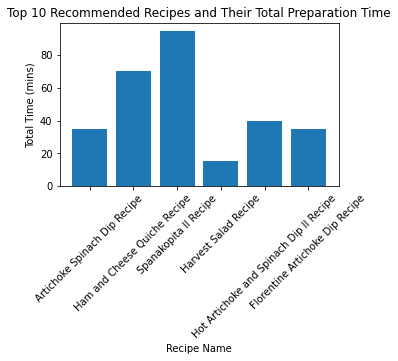

In [30]:
top_recipes = final_recommendation.head(10)

# Plotting
plt.figure(figsize=(5, 3))
plt.bar(top_recipes['title'], top_recipes['ready_time'])
plt.xlabel('Recipe Name')
plt.ylabel('Total Time (mins)')
plt.title('Top 10 Recommended Recipes and Their Total Preparation Time')
plt.xticks(rotation=45)
plt.show()

In [31]:
ingredient_list = 'chocolate,salt'

In [32]:
user_1 = random.choice(users)#123711 # user with a medium amount of ratings
user_2 = random.choice(users)#15078 # user with the lowest number of ratings
user_3 = random.choice(users)#72315 # user with a lot of ratings

In [33]:
recommended_list_1 = set_up_ml(user_1,ingredient_list) # generate a list of recommendations for each user
recommended_list_2 = set_up_ml(user_2,ingredient_list)
recommended_list_3 = set_up_ml(user_3,ingredient_list)

In [34]:
def get_final_recommendation(list_1,list_2,list_3): # combine all recommendations
    recipe_recommendation = pd.DataFrame()
    recipe_recommendation = pd.concat([list_1,list_2,list_3]) # concat lists
    recipe_recommendation = recipe_recommendation.drop_duplicates(keep='first') # drop recommended duplicates of recipes
    recipe_recommendation = recipe_recommendation.sort_values('pred_rating',ascending=False) # sort by predicted rating
    recipe_recommendation.pop('pred_rating') # drop the rating column
    recipe_recommendation = recipe_recommendation.reset_index()
    recipe_recommendation.pop('index') # reset and pop the old index
    recipe_recommendation.pop('itemid')
    #recipe_recommendation['total time'] = recipe_recommendation['prep_time']+recipe_recommendation['cook_time']
    return recipe_recommendation

In [35]:
final_recommendation = get_final_recommendation(recommended_list_1,recommended_list_2,recommended_list_3)
final_recommendation

,title,prep_time,cook_time,ready_time,ingredients,directions,url,photo_url
0,Death by Chocolate Mousse Recipe,0,5,420,"chocolate,butter,cream,chocolate,vanilla,salt,...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/16956,https://images.media-allrecipes.com/userphotos...
1,Flourless Chocolate Cake I Recipe,12,0,0,"water,salt,white sugar,chocolate,butter,egg",Preheat oven to 300 degrees F (150 degrees C)....,https://www.allrecipes.com/recipe/8149,https://images.media-allrecipes.com/userphotos...
2,Cowboy Cookie Mix in a Jar Recipe,0,0,25,"oat,brown sugar,white sugar,pecan,chocolate,fl...",Layer the ingredients in a 1 quart jar in the ...,https://www.allrecipes.com/recipe/15161,https://images.media-allrecipes.com/userphotos...
3,Cowboy Cookie Mix in a Jar Recipe,0,0,25,"oat,brown sugar,white sugar,pecan,chocolate,fl...",Layer the ingredients in a 1 quart jar in the ...,https://www.allrecipes.com/recipe/15161,https://images.media-allrecipes.com/userphotos...
4,Disappearing Marshmallow Brownies Recipe,0,20,40,"butter,butter,brown sugar,egg,vanilla,flour,ba...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/11574,https://images.media-allrecipes.com/userphotos...
...,...,...,...,...,...,...,...,...
95,Cowboy Cookies III Recipe,15,10,60,"flour,baking powder,baking soda,salt,butter,wh...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/19213,https://images.media-allrecipes.com/userphotos...
96,Eclairs II Recipe,0,45,60,"butter,water,flour,salt,egg,vanilla,milk,cream...",'Preheat oven to 450 degrees F (230 degrees C)...,https://www.allrecipes.com/recipe/19010,https://images.media-allrecipes.com/userphotos...
97,Chocolate Brittle Surprise Recipe,0,0,0,"salt,butter,brown sugar,chocolate,pecan",Preheat oven to 350 degrees F (180 degrees C)....,https://www.allrecipes.com/recipe/9901,https://images.media-allrecipes.com/userphotos...
98,Chocolate Brittle Surprise Recipe,0,0,0,"salt,butter,brown sugar,chocolate,pecan",Preheat oven to 350 degrees F (180 degrees C)....,https://www.allrecipes.com/recipe/9901,https://images.media-allrecipes.com/userphotos...


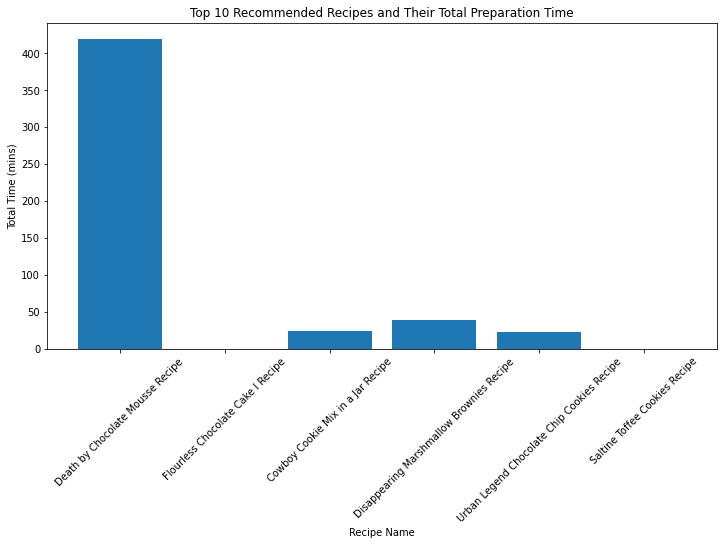

In [36]:
top_recipes = final_recommendation.head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_recipes['title'], top_recipes['ready_time'])
plt.xlabel('Recipe Name')
plt.ylabel('Total Time (mins)')
plt.title('Top 10 Recommended Recipes and Their Total Preparation Time')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Get user input for ingredients
ingredient_list = input("Enter ingredients, separated by commas: ")

# Randomly select users
user_1 = random.choice(users)  # User with a medium amount of ratings
user_2 = random.choice(users)  # User with the lowest number of ratings
user_3 = random.choice(users)  # User with a lot of ratings

# Generate a list of recommendations for each user
recommended_list_1 = set_up_ml(user_1, ingredient_list)
recommended_list_2 = set_up_ml(user_2, ingredient_list)
recommended_list_3 = set_up_ml(user_3, ingredient_list)

# Function to get final recommendations
def get_final_recommendation(list_1, list_2, list_3):
    recipe_recommendation = pd.DataFrame()
    recipe_recommendation = pd.concat([list_1, list_2, list_3])
    recipe_recommendation = recipe_recommendation.drop_duplicates(keep='first')
    recipe_recommendation = recipe_recommendation.sort_values('pred_rating', ascending=False)
    recipe_recommendation.pop('pred_rating')
    recipe_recommendation = recipe_recommendation.reset_index(drop=True)
    recipe_recommendation.pop('itemid')
    # Uncomment if you want to calculate total time
    # recipe_recommendation['total time'] = recipe_recommendation['prep_time'] + recipe_recommendation['cook_time']
    return recipe_recommendation

# Get final recommendations
final_recommendation = get_final_recommendation(recommended_list_1, recommended_list_2, recommended_list_3)

# Display the final recommendations
final_recommendation


,title,prep_time,cook_time,ready_time,ingredients,directions,url,photo_url
0,Strawberry Dream Cake I Recipe,12,0,0,"cake,strawberry,cream cheese,chocolate,whippin...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/7793,https://images.media-allrecipes.com/userphotos...
1,Death by Chocolate Mousse Recipe,0,5,420,"chocolate,butter,cream,chocolate,vanilla,salt,...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/16956,https://images.media-allrecipes.com/userphotos...
2,Saltine Toffee Cookies Recipe,17,0,0,"salt,butter,brown sugar,chocolate,pecan",Preheat oven to 400 degrees F (205 degrees C)....,https://www.allrecipes.com/recipe/11376,https://images.media-allrecipes.com/userphotos...
3,Peppermint Patties Recipe,0,10,175,"milk,pepper,sugar,chocolate,shortening","'In a large mixing bowl, combine condensed mil...",https://www.allrecipes.com/recipe/24067,https://images.media-allrecipes.com/userphotos...
4,Double Chocolate Biscotti Recipe,0,40,80,"butter,white sugar,cocoa powder,baking powder,...","In a large mixing bowl, cream butter and sugar...",https://www.allrecipes.com/recipe/10432,https://images.media-allrecipes.com/userphotos...
...,...,...,...,...,...,...,...,...
266,Self,0,0,0,"cream cheese,white sugar,egg,chocolate,chocolate",Preheat the oven to 350 degrees F (175 degrees...,https://www.allrecipes.com/recipe/7717,https://images.media-allrecipes.com/userphotos...
267,Black Bottom Cupcakes I Recipe,0,30,60,"cream cheese,egg,white sugar,salt,chocolate,fl...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/8221,https://images.media-allrecipes.com/userphotos...
268,'Chocolate Lovers'' Favorite Cake Recipe ',30,60,120,"cake,chocolate,sour cream,butter,egg,almond,ch...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/7612,https://images.media-allrecipes.com/userphotos...
269,Best Chocolate Chip Cookies Recipe,20,10,60,"butter,white sugar,brown sugar,egg,vanilla,bak...",Preheat oven to 350 degrees F (175 degrees C)....,https://www.allrecipes.com/recipe/10813,https://images.media-allrecipes.com/userphotos...


## Save the Model

In [48]:
import pickle
filename = 'recipe-recommender-model.sav.sav'
pickle.dump(item_based_recommender, open(filename, 'wb'))

In [49]:
rr_model = pickle.load(open(filename, 'rb'))

In [50]:
cross_validate(rr_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7793  0.7843  0.7800  0.7862  0.7798  0.7819  0.0028  
MAE (testset)     0.5877  0.5893  0.5854  0.5879  0.5909  0.5883  0.0018  
Fit time          0.64    0.64    0.67    0.65    0.68    0.66    0.02    
Test time         0.92    0.91    1.03    1.02    1.12    1.00    0.08    


{'test_rmse': array([0.77929576, 0.78432237, 0.78002181, 0.78622243, 0.77984951]),
 'test_mae': array([0.58774083, 0.58932467, 0.58540688, 0.58794857, 0.5909476 ]),
 'fit_time': (0.6370642185211182,
  0.6401121616363525,
  0.6734874248504639,
  0.6471121311187744,
  0.6835672855377197),
 'test_time': (0.9229846000671387,
  0.9103116989135742,
  1.034654140472412,
  1.0176734924316406,
  1.115764856338501)}